In [644]:
from sklearn.cluster import KMeans
import numpy as np
import csv
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
#####Data Processing

import pandas as pd

GSC_Features = pd.read_csv(r"GSC-Dataset/GSC-Features-Data/GSC-Features.csv")
GSC_SamePairs = pd.read_csv(r"GSC-Dataset/GSC-Features-Data/same_pairs.csv")
GSC_DiffPairs = pd.read_csv(r"GSC-Dataset/GSC-Features-Data/diffn_pairs.csv")


print(GSC_Features.shape)
print(GSC_Features.head())

print(GSC_SamePairs.shape)
print(GSC_SamePairs.head())

print(GSC_DiffPairs.shape)
print(GSC_DiffPairs.head())


def genset(dataset_type, strtext,):
    GSC_SameDiff = dataset_type.sample(n=10000).copy()
    #GSC_SameDiff = pd.concat([GSC_SamePairs, GSC_DiffPairs], ignore_index=True)





    GSC_SameDiff.to_csv("GSC_SameDiff.csv", sep=',')

    print("Which GSC type :"+strtext)
    print(GSC_SameDiff.shape)
    print(GSC_SameDiff.head())

    GSC_SameDiff.rename(index=str, columns={"img_id_A": "img_id"}, inplace=True)

    GSC_Dataset = pd.merge(GSC_SameDiff, GSC_Features,  how='inner', on=['img_id']).copy()

    GSC_Dataset.rename(index=str, columns={"img_id": "img_id_A", "img_id_B": "img_id"}, inplace=True)

    GSC_Dataset = pd.merge(GSC_Dataset, GSC_Features,  how='inner', on=['img_id']).copy()

    GSC_Dataset.rename(index=str, columns={"img_id": "img_id_B"}, inplace=True)



    GSC_SameDiffTrain = GSC_Dataset.sample(frac=0.7).copy()
    GSC_SameDiffValTest = GSC_Dataset.loc[~GSC_Dataset.index.isin(GSC_SameDiffTrain.index)].copy()
    GSC_SameDiffVal = GSC_SameDiffValTest.sample(n=1000).copy()
    GSC_SameDiffTest = GSC_SameDiffValTest.loc[~GSC_SameDiffValTest.index.isin(GSC_SameDiffVal.index)].copy()

    print("\n Split up")

    print(GSC_SameDiffTrain.shape)
    print(GSC_SameDiffTrain.head())
    GSC_SameDiffTrain.to_csv(strtext+"Train.csv", sep=',', index=False)

    print(GSC_SameDiffVal.shape)
    print(GSC_SameDiffVal.head())
    GSC_SameDiffVal.to_csv(strtext+"Val.csv", sep=',', index=False)


    print(GSC_SameDiffTest.shape)
    print(GSC_SameDiffTest.head())
    GSC_SameDiffTest.to_csv(strtext+"Test.csv", sep=',', index=False)


    print(GSC_Dataset.shape)
    print(GSC_Dataset.head())
    #GSC_Dataset.to_csv("GSC_DatasetTemp.csv", sep='\t')





    '''print("Testing the intersections for :"+strtext)
    GSC_SameDiffTestTraininter = GSC_SameDiffTrain.loc[GSC_SameDiffTrain.index.isin(GSC_SameDiffTest.index)].copy()
    GSC_SameDiffValTraininter = GSC_SameDiffTrain.loc[GSC_SameDiffTrain.index.isin(GSC_SameDiffVal.index)].copy()
    GSC_SameDiffValTestinter = GSC_SameDiffVal.loc[GSC_SameDiffVal.index.isin(GSC_SameDiffTest.index)].copy()
    print(GSC_SameDiffTestTraininter.shape)
    print(GSC_SameDiffTestTraininter.head())
    print(GSC_SameDiffValTraininter.shape)
    print(GSC_SameDiffValTraininter.head())
    print(GSC_SameDiffValTestinter.shape)
    print(GSC_SameDiffValTestinter.head()'''









genset(GSC_SamePairs, "GSC_SamePairs")
genset(GSC_DiffPairs, "GSC_DiffPairs")



GSC_SamePairsTrainset = pd.read_csv(r"GSC_SamePairsTrain.csv")
GSC_DiffPairsTrainset = pd.read_csv(r"GSC_DiffPairsTrain.csv")

GSC_SamePairsValset = pd.read_csv(r"GSC_SamePairsVal.csv")
GSC_DiffPairsValset = pd.read_csv(r"GSC_DiffPairsVal.csv")

GSC_SamePairsTestset = pd.read_csv(r"GSC_SamePairsTest.csv")
GSC_DiffPairsTestset = pd.read_csv(r"GSC_DiffPairsTest.csv")





GSC_AllPairsTrain = pd.concat([GSC_SamePairsTrainset, GSC_DiffPairsTrainset], ignore_index=True)

import pandas as pd
import numpy as np
GSC_Raw_Concat = pd.read_csv(r"GSC_Vivek_Raw_Concat.csv", header=None)
GSC_Raw_Subtract = pd.read_csv(r"GSC_Vivek_Raw_Subtract.csv", header=None)

print(GSC_Raw_Concat.shape)
print(GSC_Raw_Concat.head())

print(GSC_Raw_Subtract.shape)
print(GSC_Raw_Subtract.head())

xdftemp = np.split(GSC_Raw_Concat, [1024], axis=1)
xdf_concat = xdftemp[0].copy()
xdf_concat.to_csv("GSC_Final_X_Raw_Concat.csv", sep=',', index=False, header=False)
tdf_concat = xdftemp[1].copy()
tdf_concat.to_csv("GSC_Final_T_Raw_Concat.csv", sep=',', index=False, header=False)

print(xdf_concat.shape)
print(xdf_concat.head())

print(tdf_concat.shape)
print(tdf_concat.head())



xdftemp2 = np.split(GSC_Raw_Subtract, [512], axis=1)
xdf_concat2 = xdftemp2[0].copy()
xdf_concat2.to_csv("GSC_Final_X_Raw_Subtract.csv", sep=',', index=False, header=False)
tdf_concat2 = xdftemp2[1].copy()
tdf_concat2.to_csv("GSC_Final_T_Raw_Subtract.csv", sep=',', index=False, header=False)

print(xdf_concat2.shape)
print(xdf_concat2.head())

print(tdf_concat2.shape)
print(tdf_concat2.head())




import pandas as pd

HOD_Features = pd.read_csv(r"HumanObserved-Dataset/HumanObserved-Features-Data/HumanObserved-Features-Data.csv")
HOD_Features.drop(HOD_Features.columns[[0]], axis=1, inplace=True)

HOD_SamePairs = pd.read_csv(r"HumanObserved-Dataset/HumanObserved-Features-Data/same_pairs.csv")
HOD_DiffPairs = pd.read_csv(r"HumanObserved-Dataset/HumanObserved-Features-Data/diffn_pairs.csv")


print(HOD_Features.shape)
print(HOD_Features.head())

print(HOD_SamePairs.shape)
print(HOD_SamePairs.head())

print(HOD_DiffPairs.shape)
print(HOD_DiffPairs.head())


def genset(dataset_type, strtext, aa=791):
    HOD_SameDiff = dataset_type.sample(n=aa).copy()
    #HOD_SameDiff = pd.concat([HOD_SamePairs, HOD_DiffPairs], ignore_index=True)





    HOD_SameDiff.to_csv(strtext+".csv", sep=',')

    print("Which HOD type :"+strtext)
    print("How much :"+str(aa))

    print(HOD_SameDiff.shape)
    print(HOD_SameDiff.head())

    HOD_SameDiff.rename(index=str, columns={"img_id_A": "img_id"}, inplace=True)

    HOD_Dataset = pd.merge(HOD_SameDiff, HOD_Features,  how='inner', on=['img_id']).copy()

    HOD_Dataset.rename(index=str, columns={"img_id": "img_id_A", "img_id_B": "img_id"}, inplace=True)

    HOD_Dataset = pd.merge(HOD_Dataset, HOD_Features,  how='inner', on=['img_id']).copy()

    HOD_Dataset.rename(index=str, columns={"img_id": "img_id_B"}, inplace=True)



    HOD_SameDiffTrain = HOD_Dataset.sample(frac=0.7).copy()
    HOD_SameDiffValTest = HOD_Dataset.loc[~HOD_Dataset.index.isin(HOD_SameDiffTrain.index)].copy()
    HOD_SameDiffVal = HOD_SameDiffValTest.sample(frac=0.66).copy()
    HOD_SameDiffTest = HOD_SameDiffValTest.loc[~HOD_SameDiffValTest.index.isin(HOD_SameDiffVal.index)].copy()

    print("\n Split up")

    print(HOD_SameDiffTrain.shape)
    print(HOD_SameDiffTrain.head())
    HOD_SameDiffTrain.to_csv(strtext+"Train.csv", sep=',', index=False)

    print(HOD_SameDiffVal.shape)
    print(HOD_SameDiffVal.head())
    HOD_SameDiffVal.to_csv(strtext+"Val.csv", sep=',', index=False)


    print(HOD_SameDiffTest.shape)
    print(HOD_SameDiffTest.head())
    HOD_SameDiffTest.to_csv(strtext+"Test.csv", sep=',', index=False)


    print(HOD_Dataset.shape)
    print(HOD_Dataset.head())
    #HOD_Dataset.to_csv("HOD_DatasetTemp.csv", sep='\t')





    '''print("Testing the intersections for :"+strtext)
    HOD_SameDiffTestTraininter = HOD_SameDiffTrain.loc[HOD_SameDiffTrain.index.isin(HOD_SameDiffTest.index)].copy()
    HOD_SameDiffValTraininter = HOD_SameDiffTrain.loc[HOD_SameDiffTrain.index.isin(HOD_SameDiffVal.index)].copy()
    HOD_SameDiffValTestinter = HOD_SameDiffVal.loc[HOD_SameDiffVal.index.isin(HOD_SameDiffTest.index)].copy()
    print(HOD_SameDiffTestTraininter.shape)
    print(HOD_SameDiffTestTraininter.head())
    print(HOD_SameDiffValTraininter.shape)
    print(HOD_SameDiffValTraininter.head())
    print(HOD_SameDiffValTestinter.shape)
    print(HOD_SameDiffValTestinter.head()'''









genset(HOD_SamePairs, "HOD_SamePairs")
genset(HOD_DiffPairs, "HOD_DiffPairs", 1845)



'''HOD_SamePairsTrainset = pd.read_csv(r"HOD_SamePairsTrain.csv")
HOD_DiffPairsTrainset = pd.read_csv(r"HOD_DiffPairsTrain.csv")

HOD_SamePairsValset = pd.read_csv(r"HOD_SamePairsVal.csv")
HOD_DiffPairsValset = pd.read_csv(r"HOD_DiffPairsVal.csv")

HOD_SamePairsTestset = pd.read_csv(r"HOD_SamePairsTest.csv")
HOD_DiffPairsTestset = pd.read_csv(r"HOD_DiffPairsTest.csv")'''





#HOD_AllPairsTrain = pd.concat([HOD_SamePairsTrainset, HOD_DiffPairsTrainset], ignore_index=True)


import pandas as pd
import csv
#from sklearn.cluster import KMeans
import numpy as np
import csv
import math
#import matplotlib.pyplot
#from matplotlib import pyplot as plt
'''df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
                   'b': [4, 6, 4, 7, 15, 18],
                   'c': [1, 4, 9, 16, 25, 36],
                   'd': [6, 8, 9, 26, 55, 66]})

#print(df[0].values)
print(df)
#print(col_list[0])
#print(df[col_list[0]].values)
#print(df)
col_list = df.columns

for i in range(0,2):
    df.iloc[:, [i]] =abs(df.iloc[:, [i+2]].values-df.iloc[:, [i]].values)

print(df.iloc[:, [1]])
print(df.shape)
df.drop(df.columns[0:2], axis=1, inplace=True)
print(df)

#   2	1	1             1	   1	2	              2 	0	0           	2247,2245'''



'''def GetTargetVector(filePath):
    t = []
    with open(filePath, 'rU') as f:
        reader = csv.reader(f)
        for row in reader:
            t.append(int(row[0]))
    #print("Raw Training Generated..")
    return t


def GenerateRawData(filePath, IsSynthetic):
    dataMatrix = []
    with open(filePath, 'rU') as fi:
        reader = csv.reader(fi)
        for row in reader:
            dataRow = []
            for column in row:
                dataRow.append(float(column))
            dataMatrix.append(dataRow)

    if IsSynthetic == False:
        dataMatrix = np.delete(dataMatrix, [5, 6, 7, 8, 9], axis=1)
    dataMatrix = np.transpose(dataMatrix)
    # print ("Data Matrix Generated..")
    return dataMatrix
IsSynthetic=True
RawData   = GenerateRawData('/Users/vivad/Desktop/ML/Proj1-2python-code/Querylevelnorm_X.csv',IsSynthetic)
RawData1 = RawData
print(RawData.shape)
print(RawData)
RawData = np.concatenate((RawData, RawData1), axis=1)
print(RawData)

print(RawData.shape)
csvdf =pd.read_csv("/Users/vivad/Desktop/ML/Proj1-2python-code/Querylevelnorm_X.csv")

print(csvdf.shape)
print(csvdf.head())



#RawTarget = GetTargetVector('HOD_SamePairsTrain.csv')

#RawData   = GenerateRawData('/Users/vivad/Desktop/ML/Proj1-2python-code/Querylevelnorm_.csv',IsSynthetic=False)'''



HOD_SamePairsTrainset = pd.read_csv(r"HOD_SamePairsTrain.csv")
HOD_DiffPairsTrainset = pd.read_csv(r"HOD_DiffPairsTrain.csv")

HOD_SamePairsValset = pd.read_csv(r"HOD_SamePairsVal.csv")
HOD_DiffPairsValset = pd.read_csv(r"HOD_DiffPairsVal.csv")

HOD_SamePairsTestset = pd.read_csv(r"HOD_SamePairsTest.csv")
HOD_DiffPairsTestset = pd.read_csv(r"HOD_DiffPairsTest.csv")





HOD_AllPairsTrain = pd.concat([HOD_SamePairsTrainset, HOD_DiffPairsTrainset], ignore_index=True).copy()
print("HOD_AllPairsTrain")
print(HOD_AllPairsTrain.shape)
print(HOD_AllPairsTrain.head())

print()



HOD_AllPairsVal = pd.concat([HOD_SamePairsValset, HOD_DiffPairsValset], ignore_index=True).copy()
print("HOD_AllPairsVal")
print(HOD_AllPairsVal.shape)
print(HOD_AllPairsVal.head())

print()



HOD_AllPairsTest = pd.concat([HOD_SamePairsTestset, HOD_DiffPairsTestset], ignore_index=True).copy()
print("HOD_AllPairsTest")
print(HOD_AllPairsTest.shape)
print(HOD_AllPairsTest.head())

print()


HOD_AllPairsTrainValTest = pd.concat([HOD_AllPairsTrain, HOD_AllPairsVal, HOD_AllPairsTest ], ignore_index=True).copy()
print("HOD_AllPairsTrainValTest")
print(HOD_AllPairsTrainValTest.shape)
print(HOD_AllPairsTrainValTest.head())

print()
HOD_AllPairsTrainValTestCopy = HOD_AllPairsTrainValTest.copy()
HOD_AllPairsTrainValTest.insert(21, 'target_val', HOD_AllPairsTrainValTest['target'])
HOD_AllPairsTrainValTest = HOD_AllPairsTrainValTest.drop(HOD_AllPairsTrainValTest.columns[[2]], axis=1)

print(HOD_AllPairsTrainValTest.shape)
print(HOD_AllPairsTrainValTest.head())
col_list = list(HOD_AllPairsTrainValTest)

print(col_list)

HOD_AllPairsTrainValTest.to_csv("HOD_Vivek_RawDatasetConcat.csv", sep=',', index=False)
HOD_AllPairsTrainValTest.to_csv("HOD_Vivek_RawDatasetTake.csv", sep=',', index=False)

HOD_AllPairsTrainValTestSubtract = HOD_AllPairsTrainValTest.copy()
for i in range(2,11):
    #mergedStuff_subtract[col_list[i]] =abs(mergedStuff_dupe[col_list[i+9]].values-mergedStuff_dupe[col_list[i]].values)
    HOD_AllPairsTrainValTestSubtract.iloc[:, [i]] =abs(HOD_AllPairsTrainValTestSubtract.iloc[:, [i+9]].values-HOD_AllPairsTrainValTestSubtract.iloc[:, [i]].values)


print(" HOD Subtract")
HOD_AllPairsTrainValTestSubtract.drop(HOD_AllPairsTrainValTestSubtract.columns[11:20], axis=1, inplace=True)
print(HOD_AllPairsTrainValTestSubtract.shape)
print(HOD_AllPairsTrainValTestSubtract.head())
col_list = list(HOD_AllPairsTrainValTestSubtract)

print(col_list)
HOD_AllPairsTrainValTestSubtract.to_csv("HOD_Vivek_RawDatasetSubtract.csv", sep=',', index=False)



# Raw concat
HOD_AllPairsTrainValTest.drop(HOD_AllPairsTrainValTest.columns[0:2], axis=1, inplace=True)

HOD_AllPairsTrainValTest.to_csv("HOD_Vivek_Raw_Concat.csv", sep=',', index=False, header=False)#USe this



HOD_AllPairsTrainValTestSubtract.drop(HOD_AllPairsTrainValTestSubtract.columns[0:2], axis=1, inplace=True)


HOD_AllPairsTrainValTestSubtract.to_csv("HOD_Vivek_Raw_Subtract.csv", sep=',', index=False, header=False)#Use this




import pandas as pd
import numpy as np
HOD_Raw_Concat = pd.read_csv(r"HOD_Vivek_Raw_Concat.csv", header=None)
HOD_Raw_Subtract = pd.read_csv(r"HOD_Vivek_Raw_Subtract.csv", header=None)

print(HOD_Raw_Concat.shape)
print(HOD_Raw_Concat.head())

print(HOD_Raw_Subtract.shape)
print(HOD_Raw_Subtract.head())

xdftemp = np.split(HOD_Raw_Concat, [18], axis=1)
xdf_concat = xdftemp[0].copy()
xdf_concat.to_csv("HOD_Final_X_Raw_Concat.csv", sep=',', index=False, header=False)
tdf_concat = xdftemp[1].copy()
tdf_concat.to_csv("HOD_Final_T_Raw_Concat.csv", sep=',', index=False, header=False)

print(xdf_concat.shape)
print(xdf_concat.head())

print(tdf_concat.shape)
print(tdf_concat.head())



xdftemp2 = np.split(HOD_Raw_Subtract, [9], axis=1)
xdf_concat2 = xdftemp2[0].copy()
xdf_concat2.to_csv("HOD_Final_X_Raw_Subtract.csv", sep=',', index=False, header=False)
tdf_concat2 = xdftemp2[1].copy()
tdf_concat2.to_csv("HOD_Final_T_Raw_Subtract.csv", sep=',', index=False, header=False)

print(xdf_concat2.shape)
print(xdf_concat2.head())

print(tdf_concat2.shape)
print(tdf_concat2.head())








In [645]:
maxAcc = 0.0
maxIter = 0
# Varied from 0.1 to 1, 0.1 steps
C_Lambda = 0.3
TrainingPercent = 70
ValidationPercent = 10
TestPercent = 20
M = 17
PHI = []
IsSynthetic = False

In [646]:
# This fucntion is used to retrieve the target vector from the Querylevelnorm_t
# CSV file and append it to t [], which forms the RawTarget
def GetTargetVector(filePath):
    t = []
    with open(filePath, 'rU') as f:
        reader = csv.reader(f)
        for row in reader:  
            t.append(int(row[0]))
    #print("Raw Training Generated..")
    return t
# This function is used to get the Raw Data Matrix from the input csv file
# by passing the file's path, which is used to train the model
def GenerateRawData(filePath, IsSynthetic):    
    dataMatrix = [] 
    with open(filePath, 'rU') as fi:
        reader = csv.reader(fi)
        for row in reader:
            dataRow = []
            for column in row:
                dataRow.append(float(column))
            dataMatrix.append(dataRow)   
    
    if IsSynthetic == False :
        dataMatrix = np.delete(dataMatrix, [5,6,7,8,9], axis=1)
    dataMatrix = np.transpose(dataMatrix)     
    #print ("Data Matrix Generated..")
    return dataMatrix
# This function is used to obtained the set of Target Variables or
# Response values for the purpose training, based on 80-10-10 split, with 80% for training
def GenerateTrainingTarget(rawTraining,TrainingPercent = 70):
    TrainingLen = int(math.ceil(len(rawTraining)*TrainingPercent*0.01))
    t= rawTraining[:TrainingLen]
    print("TrainingLen"+str(TrainingLen))
    print("RawTrainingLen"+str( len(rawTraining)))


    print(str(TrainingPercent) + "% Training Target Generated..")
    return t
# This function is used to obtain the  matrix of set of data values
# for the purpose training
def GenerateTrainingDataMatrix(rawData, TrainingPercent = 70):
    T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
    d2 = rawData[:,0:T_len]
    print(str(TrainingPercent) + "% Training Data Generated..")
    return d2

# This function is used to obtain the  matrix of set of data values
# for the purpose validation
def GenerateValData(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData[0])*ValPercent*0.01))
    V_End = TrainingCount + valSize
    print("Vend"+str(V_End))
    print("TrainingPerc"+str(TrainingCount+1))
    dataMatrix = rawData[:,TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Data Generated..")  
    return dataMatrix

# This function is used to obtain the set of Target Variables or
# Response values for the purpose validation
def GenerateValTargetVector(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Target Data Generated..")
    return t

# Function which is used to produce the covariance values as a  diagonal matrix
def GenerateBigSigma(Data, MuMatrix,TrainingPercent,IsSynthetic):
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect     = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,int(TrainingLen)):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    #####
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j]+0.2
    if IsSynthetic == True:
        BigSigma = np.dot(3,BigSigma)
    else:
        BigSigma = np.dot(200,BigSigma)
    ##print ("BigSigma Generated..")
    return BigSigma


def GetScalar(DataRow,MuRow, BigSigInv):  
    R = np.subtract(DataRow,MuRow)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L

def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
    phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
    return phi_x
# Function that is invoked to create the matrix to get function values of the input features
def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 70):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*TrainingPercent*0.01) 
    #    T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
    print("1.  "+str(len(DataT)*TrainingPercent*0.01))
    #print(str())



    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.inv(BigSigma)
    print("Len Mumatrix"+str(len(MuMatrix)))
    print("int(TrainingLen)"+str(int(TrainingLen)))


    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI

# Function to get the weight matrix by using the closed-form approach 
def GetWeightsClosedForm(PHI, T, Lambda):
    Lambda_I = np.identity(len(PHI[0]))
    for i in range(0,len(PHI[0])):
        Lambda_I[i][i] = Lambda
    PHI_T       = np.transpose(PHI)
    PHI_SQR     = np.dot(PHI_T,PHI)
    PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
    PHI_SQR_INV = np.linalg.inv(PHI_SQR_LI)
    INTER       = np.dot(PHI_SQR_INV, PHI_T)
    W           = np.dot(INTER, T)
    ##print ("Training Weights Generated..")
    return W

'''def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.inv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI'''

def GetValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    ##print ("Test Out Generated..")
    return Y
# Function to generate the Error Root Mean Square
# with difference between  Predicted and Observed value as the the basis
def GetErms(VAL_TEST_OUT,ValDataAct):
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    ##print ("Accuracy Generated..")
    ##print ("Validation E_RMS : " + str(math.sqrt(sum/len(VAL_TEST_OUT))))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

## Fetch and Prepare Dataset

In [700]:

# For concatenated dataset


#GSCVivek/3/GSC_Final_T_Raw_Concat.csv
#GSCVivek/3/GSC_Final_X_Raw_Concat.csv
#GSCVivek/3/GSC_Final_T_Raw_Subtract.csv
#GSCVivek/3/GSC_Final_X_Raw_Subtract.csv
#RawTarget = GetTargetVector('UsableDataset/GSC_Final_T_Raw_Concat.csv')
#RawData   = GenerateRawData('UsableDataset/GSC_Final_X_Raw_Concat.csv',True)
RawTarget = GetTargetVector('GSCVivek/3/GSC_Final_T_Raw_Concat.csv')
RawData   = GenerateRawData('GSCVivek/3/GSC_Final_X_Raw_Concat.csv',True)
#/Users/vivad/Downloads/final-gsc.csv

print(RawData.shape)
#print(RawData.head())


print(len(RawTarget))
#print(RawTarget.head())

"""# For subtracted dataset
RawTarget = GetTargetVector('UsableDataset/GSC_Final_T_Raw_Subtract.csv')
RawData   = GenerateRawData('UsableDataset/GSC_Final_X_Raw_Subtract.csv',True)



print(RawData.shape)
#print(RawData.head())


print(len(RawTarget))
#print(RawTarget.head())"""
    
#RawInputConcat()
#RawInputSubtract()



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 'U' mode is deprecated
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 'U' mode is deprecated
  from ipykernel import kernelapp as app


(1024, 20000)
20000


"# For subtracted dataset\nRawTarget = GetTargetVector('UsableDataset/GSC_Final_T_Raw_Subtract.csv')\nRawData   = GenerateRawData('UsableDataset/GSC_Final_X_Raw_Subtract.csv',True)\n\n\n\nprint(RawData.shape)\n#print(RawData.head())\n\n\nprint(len(RawTarget))\n#print(RawTarget.head())"

## Prepare Training Data

In [701]:
TrainingTarget = np.array(GenerateTrainingTarget(RawTarget,TrainingPercent))
TrainingData   = GenerateTrainingDataMatrix(RawData,TrainingPercent)
print(TrainingTarget.shape)
print(len(TrainingTarget))


print(TrainingData.shape)

TrainingLen14000
RawTrainingLen20000
70% Training Target Generated..
70% Training Data Generated..
(14000,)
14000
(1024, 14000)


## Prepare Validation Data

In [702]:

ValDataAct = np.array(GenerateValTargetVector(RawTarget,ValidationPercent, (len(TrainingTarget))))
ValData    = GenerateValData(RawData,ValidationPercent, (len(TrainingTarget)))
print(ValDataAct.shape)
print(ValData.shape)

Vend16000
TrainingPerc14001
(1999,)
(1024, 1999)


## Prepare Test Data

In [703]:
TestDataAct = np.array(GenerateValTargetVector(RawTarget,TestPercent, (len(TrainingTarget)+len(ValDataAct))))
TestData = GenerateValData(RawData,TestPercent, (len(TrainingTarget)+len(ValDataAct)))
print(len(TestDataAct))
print(TestDataAct.shape)


print(TestData.shape)

Vend19999
TrainingPerc16000
3999
(3999,)
(1024, 3999)


## Closed Form Solution [Finding Weights using Moore- Penrose pseudo- Inverse Matrix]

In [704]:
ErmsArr = []
AccuracyArr = []
# This is used to create the clustering algorithms using K-Means clustering
# where M is the number of clusters
# Clustering is done to convert large dataset in to small clusters by finding the centroid
kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingData))
Mu = kmeans.cluster_centers_

BigSigma     = GenerateBigSigma(RawData, Mu, TrainingPercent,IsSynthetic)
TRAINING_PHI = GetPhiMatrix(RawData, Mu, BigSigma, TrainingPercent)
W            = GetWeightsClosedForm(TRAINING_PHI,TrainingTarget,(C_Lambda)) 
TEST_PHI     = GetPhiMatrix(TestData, Mu, BigSigma, 100) 
VAL_PHI      = GetPhiMatrix(ValData, Mu, BigSigma, 100)

1.  14000.0
Len Mumatrix17
int(TrainingLen)14000
1.  3999.0
Len Mumatrix17
int(TrainingLen)3999
1.  1999.0
Len Mumatrix17
int(TrainingLen)1999


In [706]:
print(Mu.shape)
print(BigSigma.shape)
print(TRAINING_PHI.shape)
print(W.shape)
print(VAL_PHI.shape)
print(TEST_PHI.shape)

(17, 1024)
(1024, 1024)
(14000, 17)
(17,)
(1999, 17)
(3999, 17)


In [709]:
# GSC Subtraction results for M=17

## Gradient Descent solution for Linear Regression

In [710]:
print ('----------------------------------------------------')
print ('--------------Please Wait for 2 mins!----------------')
print ('----------------------------------------------------')

----------------------------------------------------
--------------Please Wait for 2 mins!----------------
----------------------------------------------------


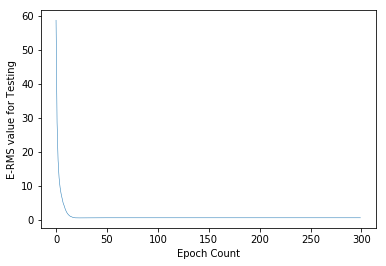

In [717]:
W_Now        = np.dot(220, W)
La           = 2
learningRate = 0.1
epochs = 300
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []
I_list = []
Erms_list = []
L_Erms_Acc = []


# Iterates over the phi matrix rows for specific epochs to converge towards the local minima value
for i in range(0, epochs):
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((TrainingTarget[i] - np.dot(np.transpose(W_Now),TRAINING_PHI[i])),TRAINING_PHI[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
    Erms_TR       = GetErms(TR_TEST_OUT,TrainingTarget)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next) 
    Erms_Val      = GetErms(VAL_TEST_OUT,ValDataAct)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = GetValTest(TEST_PHI,W_T_Next) 
    Erms_Test = GetErms(TEST_OUT,TestDataAct)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))
    L_Erms_Acc.append(float(Erms_Test.split(',')[0]))


    I_list.append(i)
    
plt.plot(I_list, L_Erms_Test, linewidth = 0.5)
plt.xlabel('Epoch Count')
plt.ylabel('E-RMS value for Testing')
plt.show()



In [719]:
print ('----------Linear Regression--------------------')


print ('----------Gradient Descent Solution--------------------')
print ('----------By Vivek Adithya--------------------')
print ('----------UB# 50290568--------------------')




print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))
print ("Testing Accuracy = " + str(np.around(max(L_Erms_Acc),5)))
print("Cluster Count ="+str(M)+"\n"+"Iterations ="+str(epochs))
print("Lambda ="+str(La)+"\n"+"Learning Rate ="+str(learningRate))

----------Linear Regression--------------------
----------Gradient Descent Solution--------------------
----------By Vivek Adithya--------------------
----------UB# 50290568--------------------
E_rms Training   = 0.46492
E_rms Validation = 0.46443
E_rms Testing    = 0.46957
Testing Accuracy = 63.94099
Cluster Count =17
Iterations =300
Lambda =2
Learning Rate =0.1


## M=17, LinReg GSC Subtract results above

In [747]:
#
####################
#############
################
#
#     Logistic Regression
#
#
#
#
#
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
import csv
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets


In [749]:
#/Users/vivad/PycharmProjects/ML_Project2/GSCVivek/3/GSC_Final_T_Raw_Concat.csv
#/Users/vivad/PycharmProjects/ML_Project2/GSCVivek/3/GSC_Final_X_Raw_Concat.csv
#/Users/vivad/PycharmProjects/ML_Project2/GSCVivek/3/GSC_Final_T_Raw_Subtract.csv
#/Users/vivad/PycharmProjects/ML_Project2/GSCVivek/3/GSC_Final_X_Raw_Subtract.csv

#/Users/vivad/PycharmProjects/ML_Project2/HODVivek/3/HOD_Final_T_Raw_Concat.csv
#/Users/vivad/PycharmProjects/ML_Project2/HODVivek/3/HOD_Final_X_Raw_Concat.csv
#/Users/vivad/PycharmProjects/ML_Project2/HODVivek/3/HOD_Final_T_Raw_Subtract.csv
#/Users/vivad/PycharmProjects/ML_Project2/HODVivek/3/HOD_Final_X_Raw_Subtract.csv





XXX = pd.read_csv(r"HODVivek/3/HOD_Final_X_Raw_Concat.csv", header=None, index_col=False)
XT = XXX[:math.ceil(len(XXX)*0.8) ]
XX = XT.as_matrix()
XTest = XXX[math.ceil(len(XXX)*0.8):len(XXX) ]
XTT = XTest.as_matrix()



YYY = pd.read_csv(r"HODVivek/3/HOD_Final_T_Raw_Concat.csv", header=None, index_col=False)
YTemp = YYY[:math.ceil(len(YYY)*0.8) ]
YYYY = YTemp.as_matrix()
YTest = YYY[math.ceil(len(YYY)*0.8):len(YYY) ]
YT1 = YTest.as_matrix()
YY = YYYY.reshape(-1)
YTT = YT1.reshape(-1)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [752]:
X = XX.copy()
y = YY.copy()

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [753]:
print("####")
print("####")
print("Please wait for 5 mins or change num_iter to lesser value")
print("Note: 1000 iters takes approx 25 seconds ")
print("####")

####
####
Please wait for 5 mins or change num_iter to lesser value
Note: 1000 iters takes approx 25 seconds 
####


In [787]:
lr=0.01
num_iter=1000000
model = LogisticRegression(lr, num_iter)

In [788]:
%time model.fit(X, y)

CPU times: user 9min 36s, sys: 4.33 s, total: 9min 40s
Wall time: 2min 28s


In [789]:
# Prediction for logistic regression based on test set labels
preds = model.predict(XTT)
print("Logistic Regression Prediction Accuracy: "+str((preds == YTT).mean()))
print("Learning Rate:"+str(lr))
print("Iterations:"+str(num_iter))

Logistic Regression Prediction Accuracy: 0.8462998102466793
Learning Rate:0.01
Iterations:1000000


In [601]:
#################################################
###############################################
#
#
#
#
## NEURAL NETWORKS
#
#
#
#

In [602]:
import pandas as pd

In [603]:
def processData(dataset, k=1):
    
    # We need to process to obtain the input column data and
    # the label column data, and store it separately
    #data   = dataset['input'].values
    #labels = dataset['label'].values
    
    data   = dataset.iloc[:18000,2:1026]
    labels = dataset.iloc[:18000,1026]
    if(k==2):
        return dataset.iloc[18000:,2:]
        
    '''print(data)
    print(data.shape)
    print(data.head())
    print(type(data))
    
    print(labels)
    print(labels.shape)
    print(labels.head())
    print(type(data))'''
    
    print()
    # Processing the input data using the specified 
    # encodeData method where each individual element is processed
    processedData  = data.as_matrix()
    
    # Processing the labels to encode them to specific
    # categorical target values like 
    # FizzBuzz = 3, Fizz = 1, Buzz = 2, Other = 0
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [604]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    # Processing the labels corresponding to inputs and 
    # encoding them to respective categorical values like 
    # FizzBuzz = 3, Fizz = 1, Buzz = 2, other=0
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == 0):
            # For FizzBuzz label
            processedLabel.append([0])
        elif(labelInstance == 1):
            # For Fizz label
            processedLabel.append([1])

        else:
            # For any other label case
            print("Check encode labels")
    
    # Converting each of the class vector(integers) to 
    # its binary representation for 4 different class types.
    return np_utils.to_categorical(np.array(processedLabel),2)

In [790]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers.advanced_activations import LeakyReLU, PReLU


import numpy as np

input_size = 1024
drop_out = 0.1
first_dense_layer_nodes  = 200
second_dense_layer_nodes = 2

def get_model():
    # Why do we need a model?
    # Models are artifacts that are created in due course
    # by machine learning algorithms.
    # Models are used for training the system to predict 
    # or anticipate for other unknown values. 
    
    # Why use sequential model with layers?
    # In Sequential model, each layer works in tandem with subsequent 
    # layers just before or after the layer itsel. Compared to Functional
    # model, Sequential model is straightforward. 
    # Sequential model is used here because there is no need for sharing
    # of layers and the systme does not have multiple inputs and outputs. 
    model = Sequential()
    
    # Why use Dense layer and then activation?
    # A dense layer is a typical densely connected 
    # Neural Network layer. 
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size, activation='linear'))
    
    # Activation Function is passed element-wise to every output. 
    # Activation applies an activation function to the output.
    # Here Leaky Relu activation is used, with alpha=0.001 being the 
    # small negative slope 
    
    
    
    
    # Optimizer models in comments
    
    # model.add(LeakyReLU(alpha=.001))
    
    # model.add(Activation('relu'))
    
    # model.add(Activation('sigmoid'))

    # model.add(Activation('tanh'))
    
    model.add(LeakyReLU(alpha=.001))
    


    
    # Why dropout?
    # Dropout is a value that denotes the fraction of input values that is set to 0
    # or ignored for dealing with the problem overfitting.
    model.add(Dropout(drop_out))
    
    # Add second dense layer of nodes containing the 4 target nodes
    model.add(Dense(second_dense_layer_nodes))
    
    # Softmax is used for multiple classification. 
    # Softmax function computes the probabilty of each 
    # probable output class, assigns a value between 0 to 1, 
    # where the sum of probabilties of every class results in value one.
    
    model.add(Activation('softmax'))

    # Summarization of the model is displayed.
    model.summary()
    
    
    
    
    # Compile method is used to configure the model training 
    # or the learning process and takes 3 parameters - the optimizer,
    # the loss function and a list of metrics to be observed.
    # Categorical_crossentropy is the loss function, which forms
    # the main objective that the model looks to minimize.
    # Categorical_crossentropy is used here because it deals with
    # multi class classification problem as this one, where the target range 
    # is 4 different classes : Fizz, Buzz, FizzBuzz and other respectively.
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [791]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 200)               205000    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 200)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 402       
_________________________________________________________________
activation_13 (Activation)   (None, 2)                 0         
Total params: 205,402
Trainable params: 205,402
Non-trainable params: 0
_________________________________________________________________


In [792]:
# HyperParameters whose values can be and in fact are 
# altered for obtaining different accuracies in results.

validation_data_split = 0.2
num_epochs = 30
model_batch_size = 512
tb_batch_size = 128
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('GSC_Vivek_RawDatasetTake.csv')
#/Users/vivad/PycharmProjects/ML_Project2/GSC_Vivek_RawDatasetTake.csv
# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Train on 14400 samples, validate on 3600 samples
Epoch 1/30
14400/14400 [==============================] - 4s 273us/step - loss: 0.7509 - acc: 0.5352 - val_loss: 0.6994 - val_acc: 0.5228
Epoch 2/30
14400/14400 [==============================] - 3s 216us/step - loss: 0.6334 - acc: 0.6378 - val_loss: 0.6601 - val_acc: 0.5886
Epoch 3/30
14400/14400 [==============================] - 3s 232us/step - loss: 0.5562 - acc: 0.7217 - val_loss: 0.5293 - val_acc: 0.7578
Epoch 4/30
14400/14400 [==============================] - 3s 231us/step - loss: 0.4939 - acc: 0.7653 - val_loss: 0.4663 - val_acc: 0.8078
Epoch 5/30
14400/14400 [==============================] - 3s 233us/step - loss: 0.4322 - acc: 0.8077 - val_loss: 0.4182 - val_acc: 0.8231
Epoch 6/30
14400/14400 [==============================] - 3s 228us/step - loss: 0.3848 - acc: 0.8374 - val_loss: 0.4417 - val_acc: 0.8025
Epoch 7/30
14400/14400 [==============================] - 3s 238us/step - loss: 0.3434 - acc: 0.8628 - val_loss: 0.4175 - v

In [793]:
def decodeLabel(encodedLabel):
    
    # Converting the encoded target labels into their original string form
    # such as Fizz, Buzz, etc
    
    if encodedLabel == 0:
        return "0"
    elif encodedLabel == 1:
        return "1"
    
    else:
        print("DecodeLabelError")

In [794]:
wrong   = 0
right   = 0

#testData = pd.read_csv('testing.csv')
testData = processData(dataset, 2)

#.as_matrix()
processedTestData = testData.iloc[:,:1024].as_matrix()
processedTestLabel1 = testData.iloc[:,1024]


print(testData.shape)
print("\n")
#processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(processedTestLabel1)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,1024))
   # print(np.array(i))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if (j.argmax() == y.argmax()):
        right = right + 1
        #print("Jarg "+str(j.argmax()))
        #print(str(y.argmax()))
    else:
        wrong = wrong + 1
        #print("Jarg "+str(j.argmax()))
        #print(str(y.argmax()))



print(" By Vivek Adithya Srinivasa Raghavan")
print(" UB#: 50290569 ")


print(" Neural Networks based Regression of Author Handwriting matches")
print(" Using 1 Input layer, 1 output, and 1 hidden layer, with ReLU")



print(" Errors: " + str(wrong), " Correct :" + str(right))

print(" Accuracy: " + str(right/(right+wrong)*100))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(2000, 1025)


 By Vivek Adithya Srinivasa Raghavan
 UB#: 50290569 
 Neural Networks based Regression of Author Handwriting matches
 Using 1 Input layer, 1 output, and 1 hidden layer, with ReLU
 Errors: 370  Correct :1630
 Accuracy: 81.5
